# 1. Парадокс инспектора

Автобусы отходят от автостанции с 8:00 до 20:00. Первый автобус отходит ровно в 8:00. Затем интервалы между автобусами случайны, независимы и равновероятно равны либо 5-и, либо 10-и минутам.
Будем считать, что за минуту на автостанцию приходит ровно один пассажир, и все пассажиры едут
ближайшим автобусом.

Проведите $10^4$ экспериментов и с их помощью:

a) [10] Постройте гистограмму количества автобусов, отошедших от автостанции за сутки. Похоже
ли визуально распределение на нормальное?

б) [10] Инспектор Тимон выбирает равновероятно один из всех автобусов отошедших от автостанции за сутки. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

в) [10] Инспектор Пумба приходит на автостанцию в случайный момент времени, равномерный
от 8:00 до 20:00 и садится в первый пришедший автобус. Постройте гистограмму числа пассажиров на этом автобусе. Оцените математическое ожидание и дисперсию этого числа.

г) [10] Как изменятся ответы на эти вопросы, если время между автобусами будет экспоненциально со средним в 10 минут?

In [40]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Пункт А

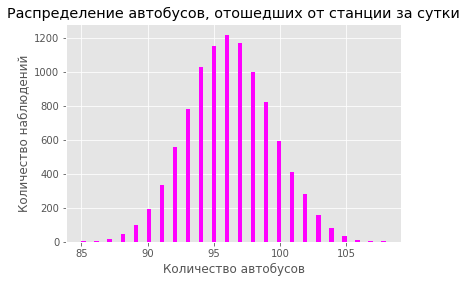

In [41]:
# считаю максимально кол-во автобусов за день
# всего в дне 720 минут, макс. количество, если автобусы каждые 5 минут
max_buses = int(720 / 5)

number_of_buses = list() # список с количествами автобусов, размер - 10**4
for i in range(10**4):
    buses_in_day = 0 # счетчик автобусов
    timings = np.random.choice([5, 10], size=max_buses) # случайные набор автобусов
    sum = 0 # суммарное время
    j = 0 # счетчик в цикле
    while (sum < 720):
        sum += timings[j]
        j += 1
        buses_in_day += 1
    number_of_buses.append(buses_in_day)

plt.hist(number_of_buses, color='magenta', bins = 70)
plt.title('Распределение автобусов, отошедших от станции за сутки')
plt.xlabel('Количество автобусов')
plt.ylabel('Количество наблюдений')
plt.show()

## Пункт Б

In [42]:
# гистограмма рапределения пассажиров
def passengers_plot(passengers, bins = 10):
    plt.hist(passengers, color='magenta', bins=bins)
    plt.title('Распределение числа пассажиров в автобусе')
    plt.xlabel('Количество пассажиров в автобусе')
    plt.ylabel('Количество наблюдений')
    plt.show()

    print(f"Математическое ожидание: {passengers.mean()}")
    print(f"Дисперсия: {passengers.var()}")

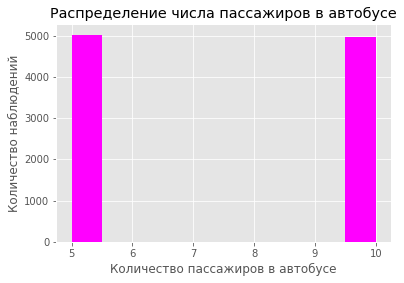

Математическое ожидание: 7.484
Дисперсия: 6.249744000000001


In [43]:
passengers = np.random.choice([5, 10], size=10**4) # случайные набор автобусов
passengers_plot(passengers)

## Пункт В

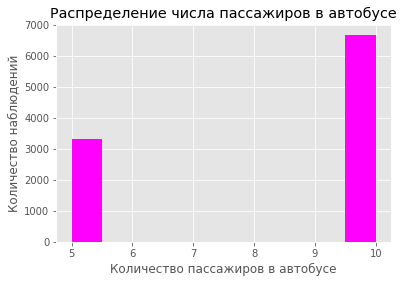

Математическое ожидание: 8.337
Дисперсия: 5.549430999999999


In [45]:
passengers = list()
for i in range(10**4):
    time = np.random.choice(np.arange(720)) # случайное время прихода на остановку
    timings = np.random.choice([5, 10], max_buses) # случайные набор автобусов
    sum = 0
    j = 0
    while (sum <= time): # увеличиваем счетчик, пока суммарное время с начала дня меньше времени прихода на остановку
        sum += timings[j]
        j += 1
    passengers.append(timings[j - 1]) # берем последнее добавленное время 

passengers = np.array(passengers)
passengers_plot(passengers)

## Пункт Г

### А)

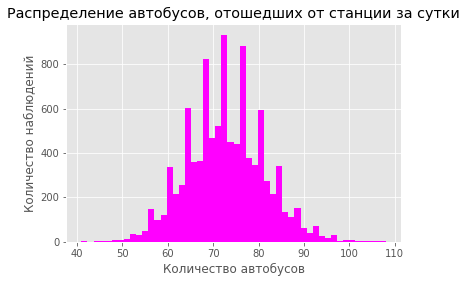

In [46]:
# в пункте Г точно такой же код, только время находим через np.random.exponential(10)

max_buses = int(720 / 5)

number_of_buses = list()
for i in range(10**4):
    buses_in_day = 0
    timings = np.random.exponential(10, size=max_buses)
    sum = 0
    j = 0
    while (sum < 720):
        sum += timings[j]
        j += 1
        buses_in_day += 1
    number_of_buses.append(buses_in_day)

number_of_buses = np.array(number_of_buses)

plt.hist(number_of_buses, color='magenta', bins = 50)
plt.title('Распределение автобусов, отошедших от станции за сутки')
plt.xlabel('Количество автобусов')
plt.ylabel('Количество наблюдений')
plt.show()

### Б)

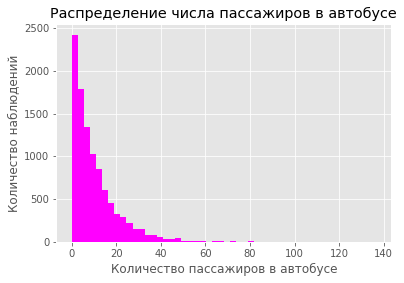

Математическое ожидание: 10.159882431926778
Дисперсия: 107.511779490836


In [47]:
passengers = np.random.exponential(10, size=10**4)
passengers_plot(passengers, 50)

### В)

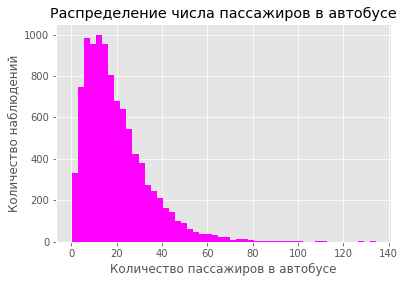

Математическое ожидание: 19.56313718182566
Дисперсия: 193.62050775976908


In [48]:
passengers = list()
for i in range(10**4):
    time = np.random.choice(np.arange(720))
    timings = np.random.exponential(10, max_buses)
    sum = 0
    j = 0
    while (sum <= time):
        sum += timings[j]
        j += 1
    passengers.append(timings[j - 1])
    
passengers = np.array(passengers)
passengers_plot(passengers, 50)

# Парадокс Хуана Мануэля Родригеса Паррондо.

У Атоса, Портоса и Арамиса по 1000 франков.

Атос постоянно ходит в казино А, где каждый раз выигрывает один франк с вероятностью 0.49 и
проигрывает один франк с вероятностью 0.51.

Портос ходит в казино Б, где ситуация интереснее :) Если богатство посетителя кратно трём, то посетитель выигрывает франк с вероятностью 0.09 и проигрывает один франк с вероятностью 0.91.\
Если богатство посетителя не кратно трём, то посетитель выигрывает франк с вероятностью 0.74 и
проигрывает один франк с вероятностью 0.26.

Арамис каждый раз выбирает казино А или казино Б равновероятно.

Проведите $10^4$ симуляций эволюции благосостояния Атоса, Портоса и Арамиса. Каждая симуляция
предусматривает 1000 посещений казино. Все три игрока все деньги носят с собой и ни на что не
тратят :)

а) [10] Постройте на графике 10 случайных траекторий изменений богатства Атоса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте усреднённую по всем экспериментам тракторию изменения богатства.\
б) [10] Постройте на графике 10 случайных траекторий изменений богатства Портоса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте
усреднённую по всем экспериментам тракторию изменения богатства.\
в) [10] Постройте на графике 10 случайных траекторий изменений богатства Арамиса, по горизонтали —номер посещени казино, по вертикали —богатство. На том же графике постройте
усреднённую по всем экспериментам тракторию изменения богатства.

In [49]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
plt.style.use('ggplot')

In [50]:
n = 10**4

def casino_A():
    result = list()
    result = np.random.choice([-1, 1], size=10**3, p = [0.51, 0.49]) # генерируем 1000 посещений казино
    result = np.cumsum(result) # считаем кумулятивную сумму
    result += 1000 # к каждому значению прибавляем 1000 монет 
    return result

def casino_B():
    result = list()
    result.append(1000) # начальное значение
    for j in range(1, 10**3 + 1): # 1000 посещений казино
        if (result[j - 1] % 3 == 0):
            game_res = np.random.choice([-1, 1], size=1 , p = [0.91, 0.09])[0]
        else:
            game_res = np.random.choice([-1, 1], size=1 , p = [0.26, 0.74])[0]
        # кладем в список текущий результат + количество монет, 
        # которое было до очередного посещения казино (по сути это кумулятивная сумма)
        result.append(game_res + result[j - 1]) 
    return result[1: -1]

def casino_A_and_B():
    result = list()
    result.append(1000) # начальное значение
    for j in range(1, 10**3 + 1): # 1000 посещений казино
        if np.random.choice([True, False]): # случайно выбираем казино А или Б
            if (result[j - 1] % 3 == 0):
                game_res = np.random.choice([-1, 1], size=1 , p = [0.91, 0.09])[0]
            else:
                game_res = np.random.choice([-1, 1], size=1 , p = [0.26, 0.74])[0]
            result.append(game_res)
        else:
            result.append(np.random.choice([-1, 1], size=1, p = [0.51, 0.49]))
        
        result[j] += result[j - 1] # прибавляем предыдущее значение 
    return result[1: -1]        
 
# функция для рисования графика
def draw_plot(player_res, name):
    plt.figure(figsize=(15,8))

    for i in range(10):
        # выбираем случайное число от 0 до n, это номер траектории изменения богатства
        pos = np.random.choice(np.arange(n))
        # рисуем по этой траектории график
        plt.plot(player_res[pos])

    average = player_res.mean(axis=0) # считаем среднее из всех
    plt.plot(average, color='blue')
    plt.xlabel('Номер посещения казино')
    plt.ylabel('Богатство')
    plt.title('Изменения богатства ' + name)
    plt.show()

## Атос

In [51]:
athos = list()
# генерируем n посещений казино Атосом
for i in tqdm_notebook(range(n)):
    athos.append(casino_A())
athos = np.array(athos)

<ipython-input-51-06c0a2110c8f>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


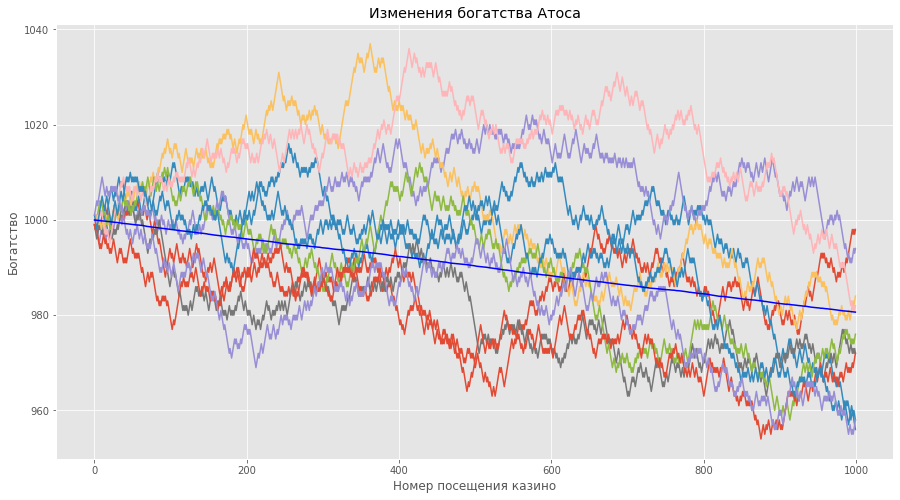

In [52]:
draw_plot(athos, 'Атоса')

In [239]:
porthos = list()
# генерируем n посещений казино Портосом
for i in tqdm_notebook(range(n)):
    porthos.append(casino_B())
porthos = np.array(porthos)

<ipython-input-236-eade07c4f648>:14: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


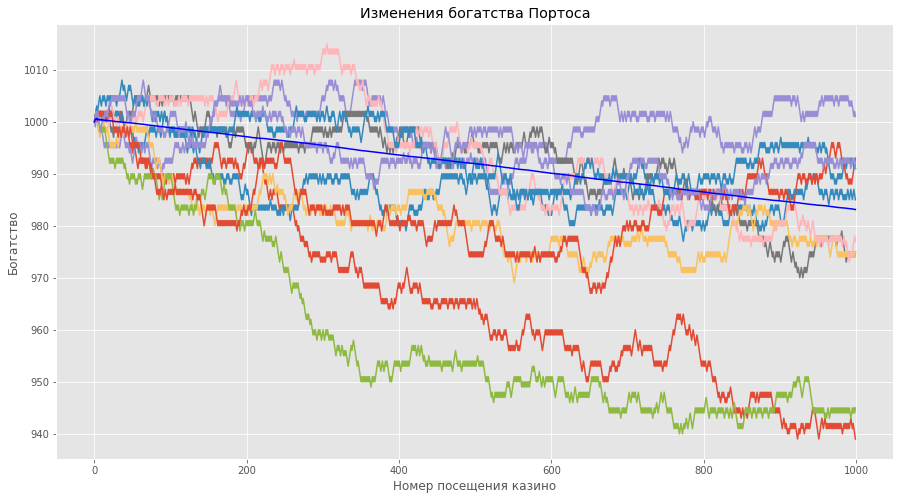

In [287]:
draw_plot(porthos, 'Портоса')

In [273]:
aramis = list()
# генерируем n посещений казино Арамисом
for i in tqdm_notebook(range(n)):
    aramis.append(casino_A_and_B())
aramis = np.array(aramis)

<ipython-input-273-d5d8b4db8faa>:2: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(n)):


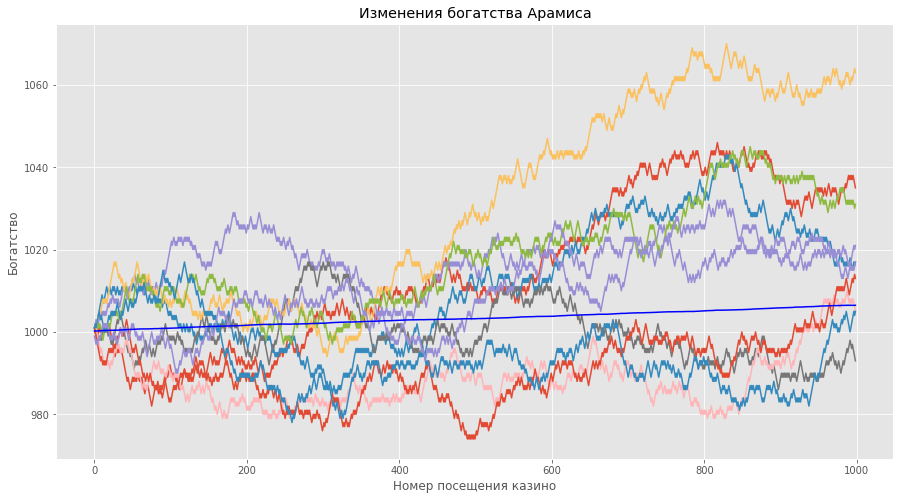

In [286]:
draw_plot(aramis, 'Арамиса')

# Парадокс Берксона.

Предположим, что результаты ЕГЭ школьников по русскому и математике независимы и хорошо
аппроксимируются нормальным распределением с ожиданием 60 и стандартным отклонением 10.

УШЭ (Урюпинская Школа Экономики) ныне престижна и забирает себе всех школьников набравших
более n баллов в сумме по русскому и математике.

Для каждого n от 80 до 160 с шагом 5 случайно создайте $10^4$ школьников и поделите их на прошедших и не прошедших в УШЭ.

а) [10] Постройте график числа прошедших в УШЭ в зависимости от n.\
б) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди прошедших в УШЭ.\
в) [10] Постройте график выборочной корреляции между результатами по русскому и математике
в зависимости от n среди не прошедших в УШЭ.

In [53]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

## Пункт А

In [54]:
def shkolniki_proshli(n):
    math = np.random.normal(loc=60, scale=10, size=10**4) # результаты по математике
    rus = np.random.normal(loc=60, scale=10, size=10**4) # результаты по русскому
    total = math + rus # общее количество баллов
    return total[total >= n].size # количество студентов, у которых общее количество баллов больше n

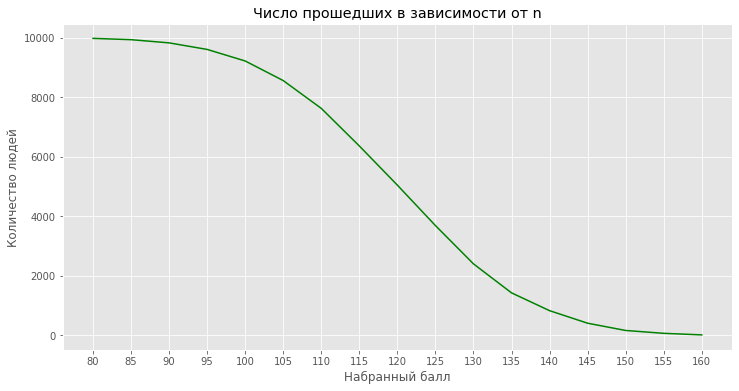

In [55]:
proshli = list()
score = list()

for i in range(80, 161, 5):
    proshli.append(shkolniki_proshli(i)) # считаем количество прошедших
    score.append(i) # количество баллов, чтобы пройти

# строим график
plt.figure(figsize=(12, 6))
plt.plot(score, proshli, color='green')
plt.title('Число прошедших в зависимости от n')
plt.xlabel('Набранный балл')
plt.ylabel('Количество людей')
plt.xticks(score)
plt.show()

## Пункт Б

In [56]:
def correlation_passed(n):
    math = np.random.normal(loc=60, scale=10, size=10**4) # результаты по математике
    rus = np.random.normal(loc=60, scale=10, size=10**4) # результаты по русскому
    total = math + rus # общее количество баллов
    
    math_sut = list()
    rus_sut = list()
    for i in range(10**4):
        if total[i] >= n: # если прошел, то берем значение математики и русского
            math_sut.append(math[i])
            rus_sut.append(rus[i])
    return np.corrcoef(math_sut, rus_sut)[0][1] # считаем корреляционную матрицу и из нее берем корреляцию

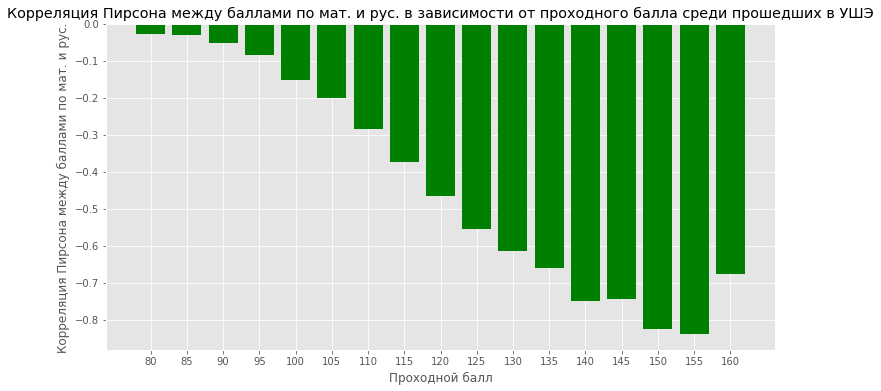

In [57]:
cor_list = list()
score = list()

for i in range(80, 161, 5):
    cor_list.append(correlation_passed(i)) # считаем корреляцию у тех, кто прошел
    score.append(i)

# рисуем график 
plt.figure(figsize=(12, 6))
plt.bar(score, cor_list, color='green', width=4)
plt.xlabel('Проходной балл')
plt.ylabel('Корреляция Пирсона между баллами по мат. и рус.');
plt.title('Корреляция Пирсона между баллами по мат. и рус. в зависимости от проходного балла среди прошедших в УШЭ')
plt.xticks(score)
plt.show()

## Пункт В

In [58]:
def correlation_not_passed(n):
    math = np.random.normal(loc=60, scale=10, size=10**4)
    rus = np.random.normal(loc=60, scale=10, size=10**4)
    result = math + rus
    
    math_sut = list()
    rus_sut = list()
    for i in range(10**4):
        if result[i] < n: # все как в Б, только тут берем значения, если общее меньше n
            math_sut.append(math[i])
            rus_sut.append(rus[i])
    return np.corrcoef(math_sut, rus_sut)[0][1]

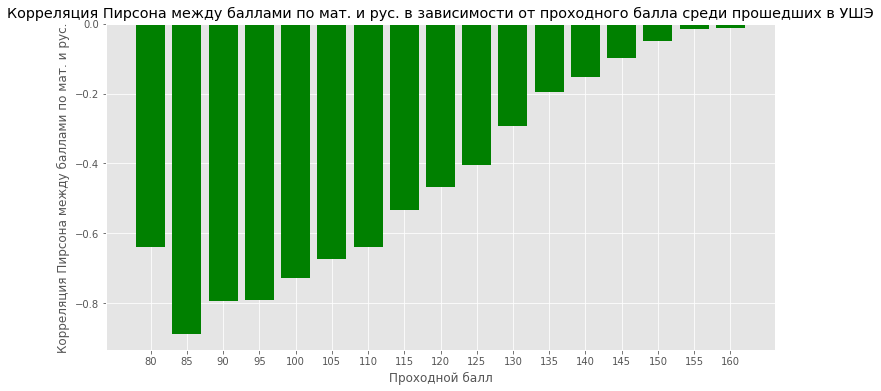

In [59]:
cor_list = list()
score = list()

for i in range(80, 161, 5):
    cor_list.append(correlation_not_passed(i))
    score.append(i)

cor_list
plt.figure(figsize=(12, 6))
plt.bar(score, cor_list, color='green', width=4)
plt.xlabel('Проходной балл')
plt.ylabel('Корреляция Пирсона между баллами по мат. и рус.');
plt.title('Корреляция Пирсона между баллами по мат. и рус. в зависимости от проходного балла среди прошедших в УШЭ')
plt.xticks(score)
plt.show()

# Парадокс Штайна.

Ниф-Ниф, Наф-Наф и Нуф-Нуф качают пресс на карантине, чтобы приготовиться к встрече Волка :)
Количества подъёмов туловища в i-й день у поросят обозначим $X_i$, $Y_i$ и $Z_i$. Эти величины независимы и хорошо аппроксимируются нормальным распределением $X_i \sim N (60, 100), Y_i \sim N (70, 100), Z_i \sim N (80, 100)$.

Карантин длится 100 дней. Волк не знает математических ожиданий (60, 70, 80), но знает дисперсии.
Волку удаётся подсмотреть, сколько раз поросята поднимают свои туловища.

Проведите $10^4$ симуляций карантина :)

In [60]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline

а) [10] Для каждой симуляции помогите Волку посчитать оценки $\hat\mu_x, \hat\mu_y, \hat\mu_z$ методом максимального правдоподобия. Постройте гистограмму каждой из оценок и обозначьте на них истинные
значения параметров.

In [61]:
n = 10**4

# генерируем x, y, z
x = np.random.normal(loc=60, scale=10, size=(n, 100))
y = np.random.normal(loc=70, scale=10, size=(n, 100))
z = np.random.normal(loc=80, scale=10, size=(n, 100))

mu_x = list()
mu_y = list()
mu_z = list()
for i in range(n): # считаем оценки с помощью stats.norm.fit
    mu_x.append(stats.norm.fit(x[i])[0])
    mu_y.append(stats.norm.fit(y[i])[0])
    mu_z.append(stats.norm.fit(z[i])[0])

In [62]:
# функция для рисования графиков
# mu: оценки 
# origin_mu: мат. ожидание из условия (истинное значение параметра)
# name: имя порося
def draw_hist(mu, origin_mu, name):
    plt.figure(figsize=(12, 7))
    plt.hist(mu, bins=100, color='purple')
    plt.axvline(origin_mu, color='cyan', linestyle='dashed', linewidth=2)
    plt.xlabel('Оценки');
    plt.ylabel('Частота');
    plt.title('Гистограмма для оценок Волка мат.ожидания поросенка ' + name);
    plt.show()

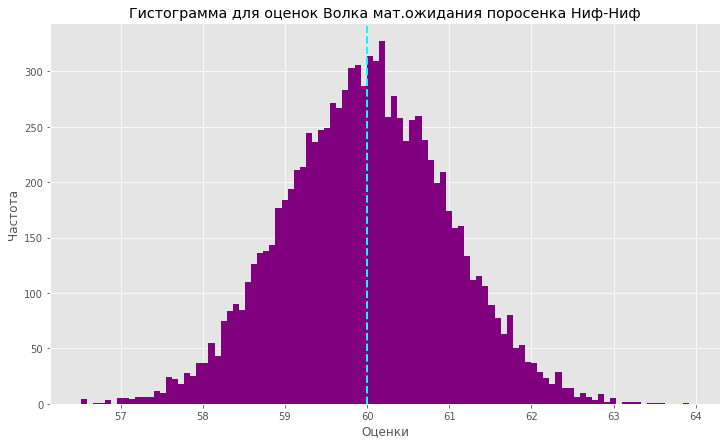

In [63]:
draw_hist(mu_x, 60, 'Ниф-Ниф')

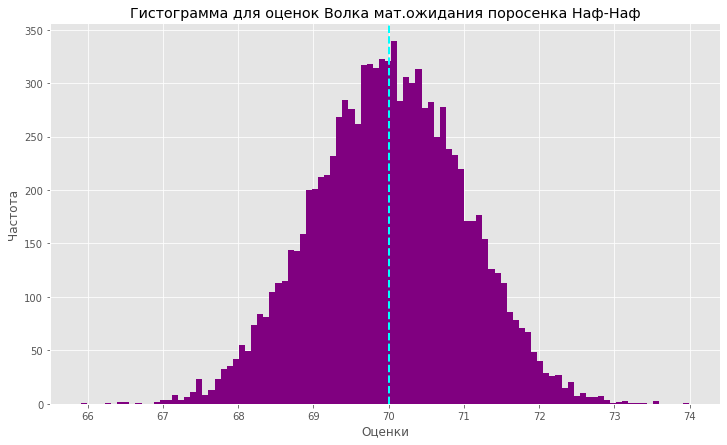

In [64]:
draw_hist(mu_y, 70, 'Наф-Наф')

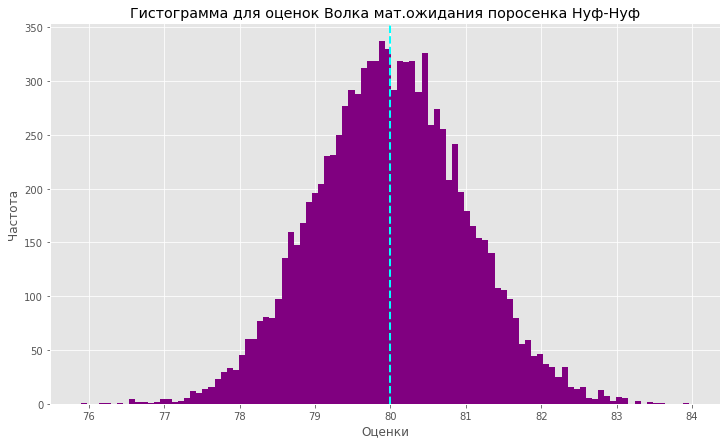

In [65]:
draw_hist(mu_z, 80, 'Нуф-Нуф')

б) [3] Постройте гистограмму суммарной квадратичной ошибки, $S=(\hat\mu_x-\mu_x)^2 + (\hat\mu_y-\mu_y)^2 + (\hat\mu_z-\mu_z)^2$. Оцените математическое ожидание суммарной квадратичной ошибки.

In [67]:
mu_x = np.array(mu_x)
mu_y = np.array(mu_y)
mu_z = np.array(mu_z)

s = (mu_x - 60)**2 + (mu_y - 70)**2 + (mu_z - 80)**2 # считаем суммарную квадратичную ошибку
print('Математическое ожидание суммарной квадратичной ошибки волка', np.mean(s))

Математическое ожидание суммарной квадратичной ошибки волка 2.97361239610064


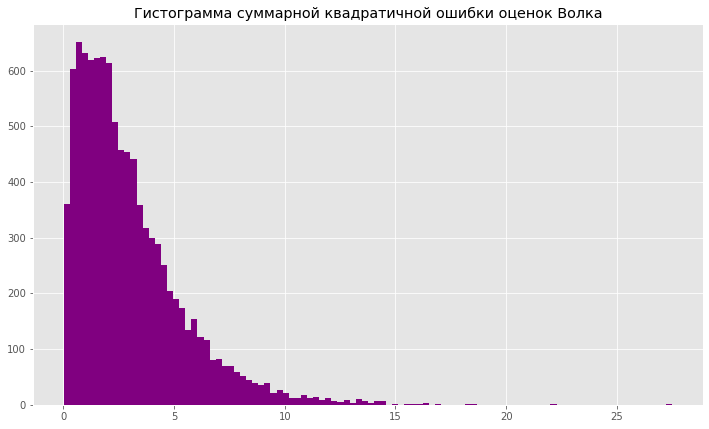

In [68]:
# строим гистограмму
plt.figure(figsize=(12, 7))
plt.hist(s, bins=100, color='purple')
plt.title('Гистограмма суммарной квадратичной ошибки оценок Волка');
plt.show()

в) [5] Отложите оценки Волка $\mu_x$ и $\mu_y$ на диаграмме рассеяния. Найдите их выборочную корреляцию.

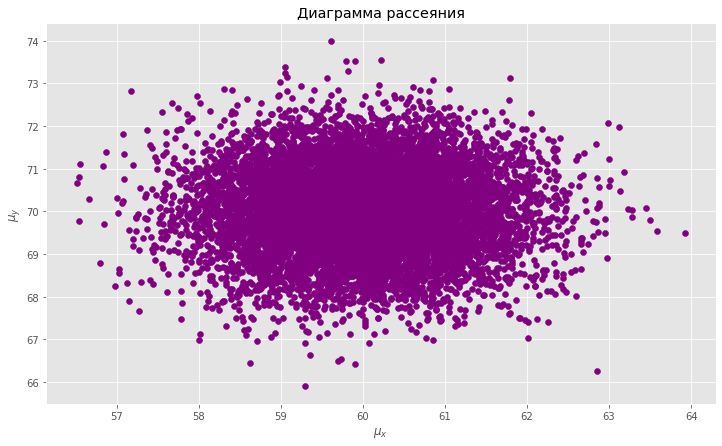

In [69]:
plt.figure(figsize=(12, 7))
plt.scatter(mu_x, mu_y, color='purple') # строим диаграмму рассеяния
plt.xlabel('$\mu_x$');
plt.ylabel('$\mu_y$');
plt.title('Диаграмма рассеяния');
plt.show()

In [70]:
print('Выборочная корреляция', np.corrcoef(mu_x, mu_y)[0][1])

Выборочная корреляция 0.0024663173719961027


Обозначим вектор трёх оценок Волка одной буквой $\hat\mu$. Хитрый Лис тоже охотится на Трёх Поросят. Он
берёт вектор оценок Волка, домножает его на хитрый множитель, и получает вектор оценок Хитрого
Лиса:
$$
\tilde{\mu} = (1 - \frac{1}{||\hat\mu||^2})\hat\mu
$$

г) [10] Выполните предыдущие три пункта для оценок Хитрого Лиса.

$$
||a|| = \sqrt{a_0^2 + \ldots + a_n^2}
$$

In [71]:
mu = mu_x**2 + mu_y**2 + mu_z**2 # сумма квадратов оценок (то что стоит в знаменателе формулы)

# считаем оценку x, y, z для лиса
mu_lx = (1 - 1/mu)*mu_x 
mu_ly = (1 - 1/mu)*mu_y
mu_lz = (1 - 1/mu)*mu_z

# все что ниже это код как у волка, только подставляем только что найденные значения

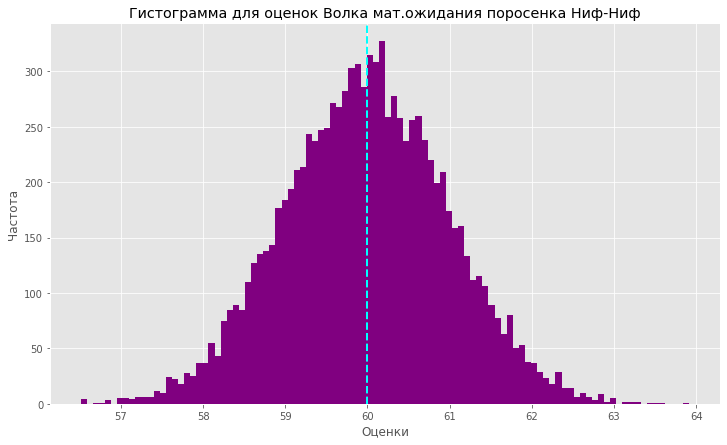

In [72]:
draw_hist(mu_lx, 60, 'Ниф-Ниф')

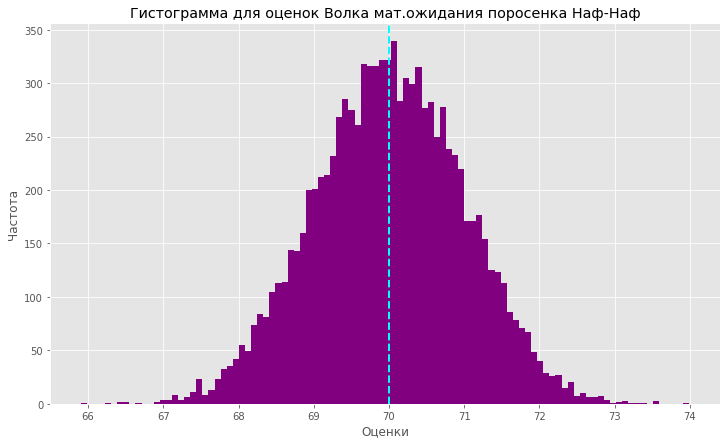

In [73]:
draw_hist(mu_ly, 70, 'Наф-Наф')

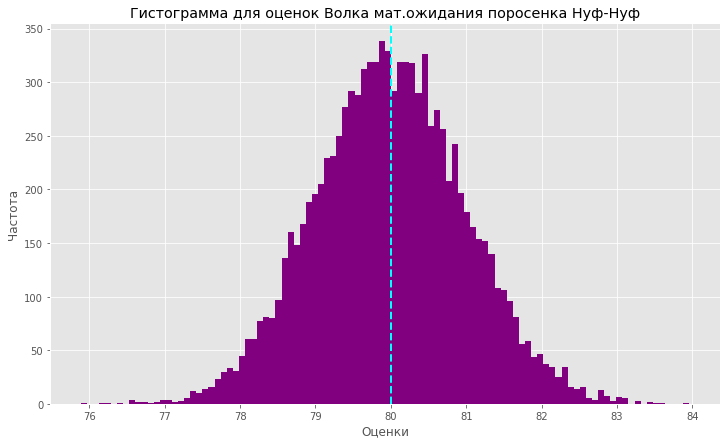

In [74]:
draw_hist(mu_lz, 80, 'Нуф-Нуф')

Математическое ожидание суммарной квадратичной ошибки Хитрого Лиса 2.973620187039962


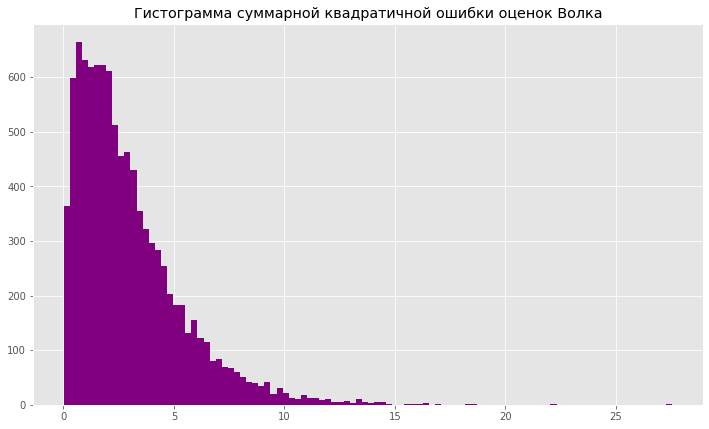

In [75]:
mu_lx = np.array(mu_lx)
mu_ly = np.array(mu_ly)
mu_lz = np.array(mu_lz)

sl = (mu_lx - 60)**2 + (mu_ly - 70)**2 + (mu_lz - 80)**2
print('Математическое ожидание суммарной квадратичной ошибки Хитрого Лиса', np.mean(sl))

plt.figure(figsize=(12, 7))
plt.hist(sl, bins=100, color='purple')
plt.title('Гистограмма суммарной квадратичной ошибки оценок Волка');
plt.show()

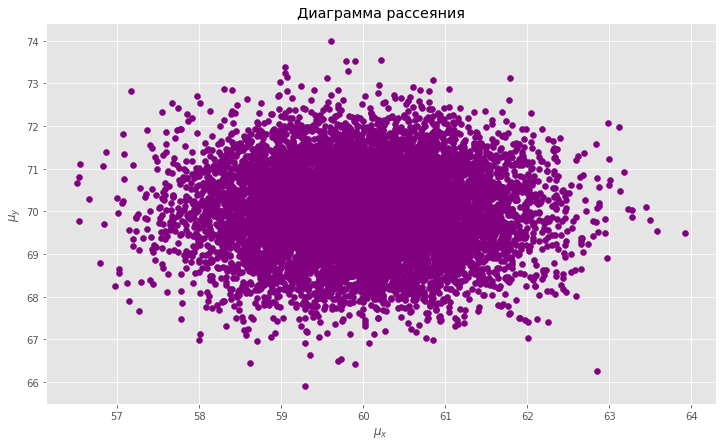

In [76]:
plt.figure(figsize=(12, 7))
plt.scatter(mu_lx, mu_ly, color='purple')
plt.xlabel('$\mu_x$');
plt.ylabel('$\mu_y$');
plt.title('Диаграмма рассеяния');
plt.show()